In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2005-01-01'
end = '2024-12-31'
stock = 'TCS.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


# **PREPROCESSING**

In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,166.932495,169.587494,166.932495,169.157501,119.271049,4734168
1,2005-01-04,168.750000,169.250000,166.645004,167.657501,118.213493,4979104
2,2005-01-05,167.524994,167.524994,160.037506,165.625000,116.780418,9604320
3,2005-01-06,165.000000,168.250000,161.562500,165.057495,116.380203,8006888
4,2005-01-07,166.250000,168.125000,164.082504,167.494995,118.098869,7623136
...,...,...,...,...,...,...,...
4814,2024-07-09,3985.000000,4006.949951,3975.100098,3985.500000,3985.500000,1305801
4815,2024-07-10,3983.699951,4003.300049,3902.000000,3909.149902,3909.149902,2669716
4816,2024-07-11,3931.000000,3980.000000,3895.600098,3923.699951,3923.699951,4872189
4817,2024-07-12,3980.000000,4199.950195,3971.300049,4183.950195,4183.950195,13509164


In [5]:
ma_100_days = data.Close.rolling(100).mean()

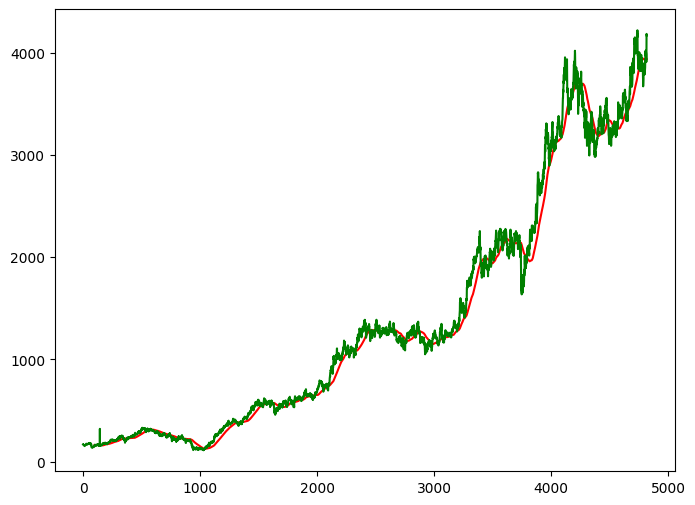

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

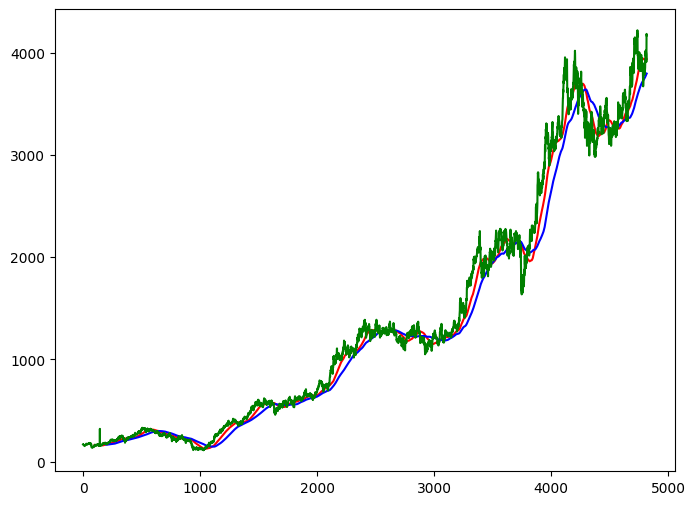

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [14]:
x, y = np.array(x), np.array(y)

# **MODEL**

In [15]:
import sys
sys.setrecursionlimit(10000)

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\dream\OneDrive\Desktop\STOCK_PRICE_PREDICTOR\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - loss: 0.0459
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0064
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0055
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0042
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0050
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - loss: 0.0037
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 0.0042
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0038
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0032
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 0.0036
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0034
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 0.0030
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0030
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0027
Epoch 15/50
118/118 ━━━━━━━━

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

# **PREDICT**

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)


In [26]:
y_predict = model.predict(x)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

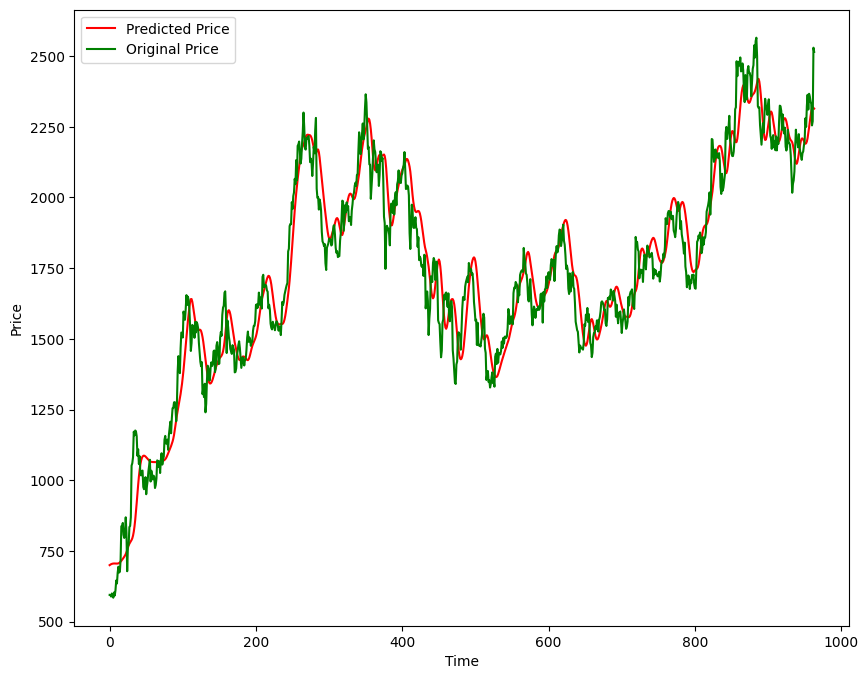

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')